![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [204]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

In [205]:
import numpy as np

df.price = df.price.replace('Договорная', np.nan).astype(float)

In [206]:
df['size'] = df['size'].replace('Площадьземли:1сот', 100).astype(float)

In [207]:
df.loc[df.price > 1000000, 'price'] = np.nan

In [208]:
# Group by 'district' and calculate the mean of 'price' for each group
price_mean = df.groupby('district')['price'].transform(lambda x: x.fillna(x.mean()))

df['price'] = df['price'].fillna(price_mean)

In [209]:
df['m2_per_room'] = df['size'] / df.rooms
df['price_per_m2'] = df.price / df['size']
df['room_price'] = df.price / df.rooms

In [210]:
trash = df.loc[df['m2_per_room'] > 100].index
df.drop(index=trash, inplace=True)

trash = df.loc[df['size'] < 5].index
df.drop(index=trash, inplace=True)

trash = df.loc[df.price_per_m2 > 5000].index
df.drop(index=trash, inplace=True)

trash = df[(df.price_per_m2 < 100) | ((df.m2_per_room < 20) & (df.price_per_m2 > 2500))].index
df.drop(index=trash, inplace=True)

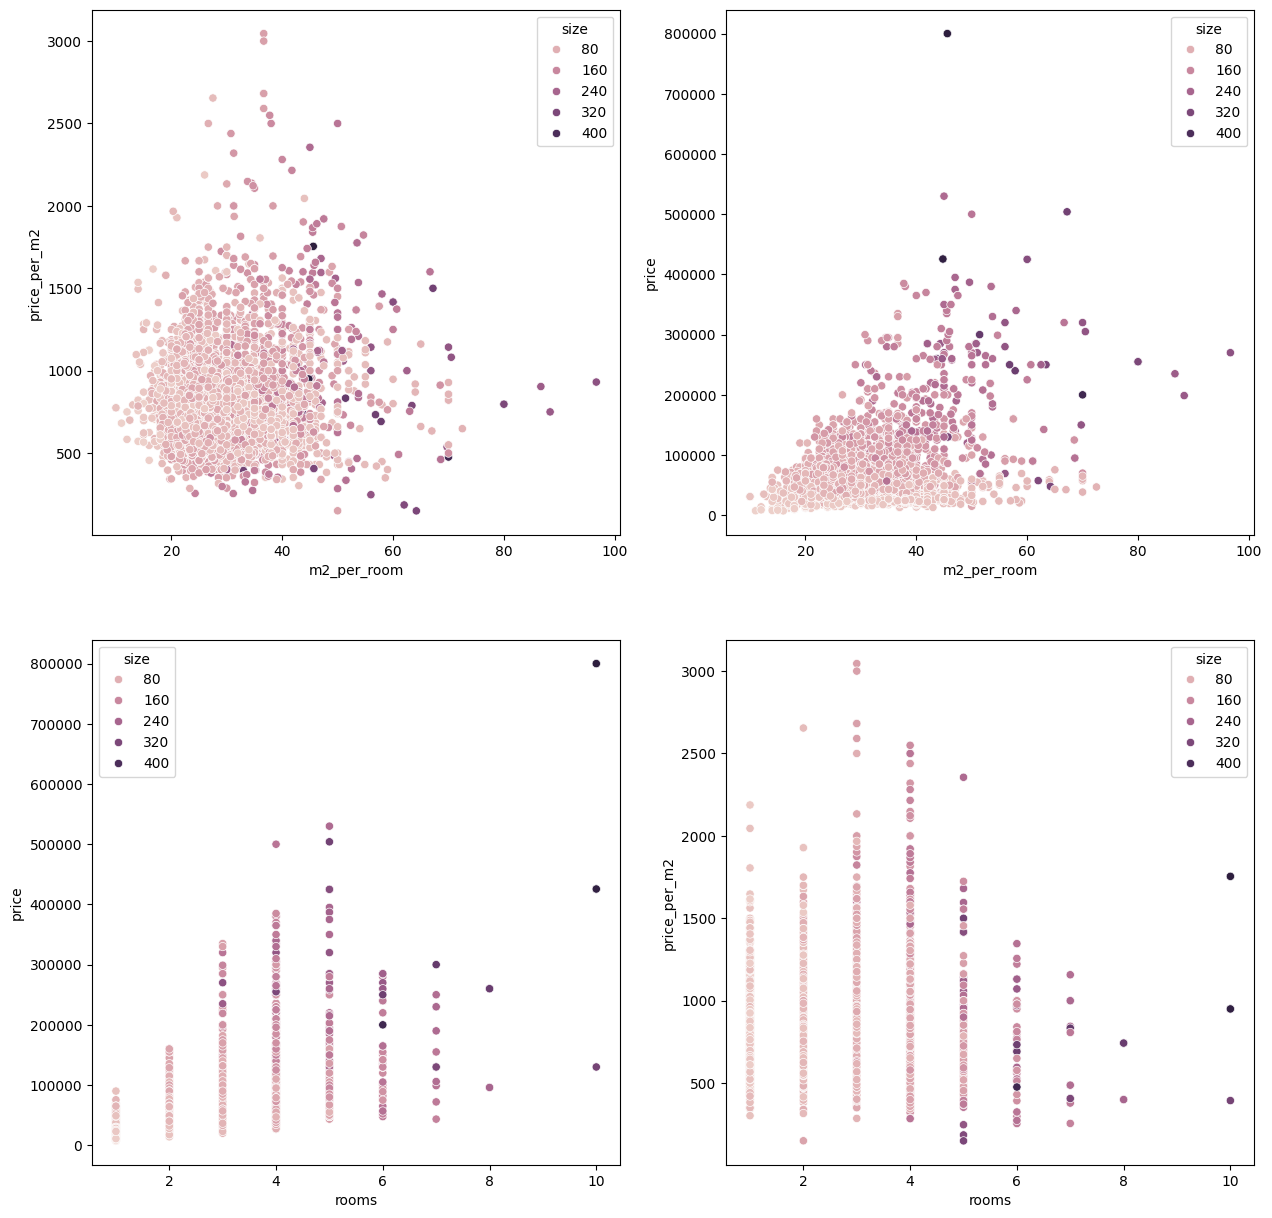

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns

data = df

fig, ax = plt.subplots(2, 2, figsize=(15, 15))

sns.scatterplot(data=data, x='m2_per_room', y='price_per_m2', ax=ax[0, 0], hue='size')
sns.scatterplot(data=data, x='m2_per_room', y='price', ax=ax[0, 1], hue='size')
sns.scatterplot(data=data, x='rooms', y='price', ax=ax[1, 0], hue='size')
sns.scatterplot(data=data, x='rooms', y='price_per_m2', ax=ax[1, 1], hue='size')

plt.show()

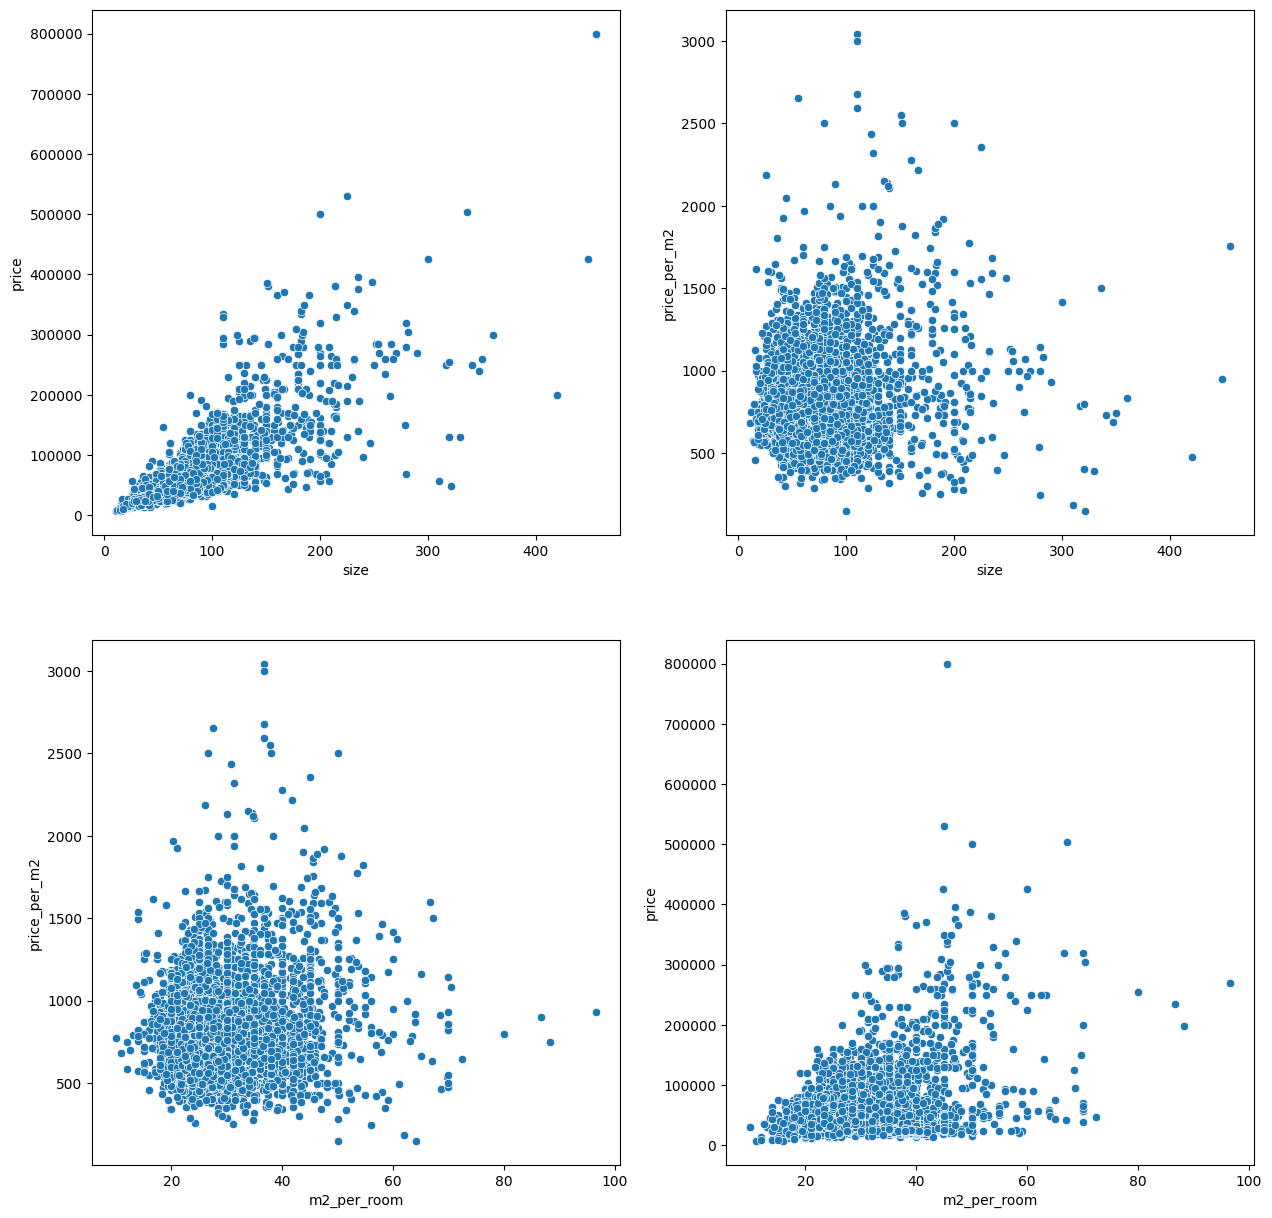

In [212]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

sns.scatterplot(data=df, x='size', y='price', ax=ax[0, 0])
sns.scatterplot(data=df, x='size', y='price_per_m2', ax=ax[0, 1])
sns.scatterplot(data=df, x='m2_per_room', y='price_per_m2', ax=ax[1, 0])
sns.scatterplot(data=df, x='m2_per_room', y='price', ax=ax[1, 1])

plt.show()

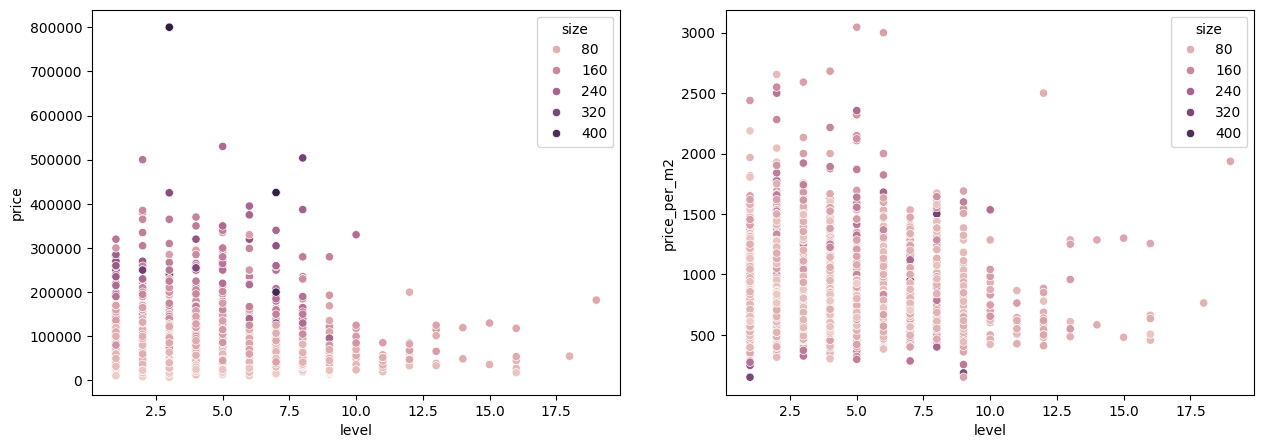

In [223]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(data=df, x='level', y='price', ax=ax[0], hue='size')
sns.scatterplot(data=df, x='level', y='price_per_m2', ax=ax[1], hue='size')

plt.show()

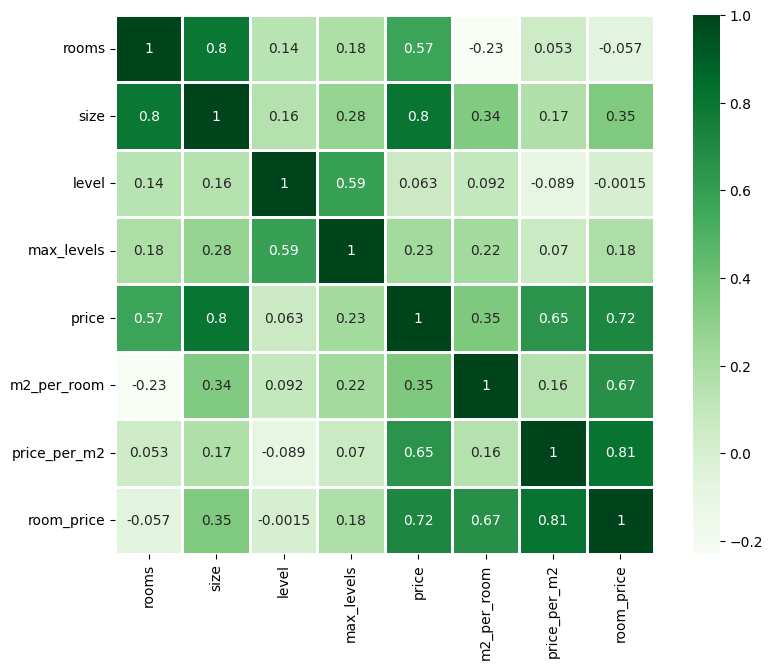

In [230]:
corr = df.corr()

plt.figure(figsize=(10, 7))

sns.heatmap(data=corr, square=True, cmap='Greens', linewidths=1, annot=True)

plt.show()